In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import xarray as xr
import os
import glob
import matplotlib.pyplot as plt

In [2]:
def retrieve_model_path(Type = 'COM_NEMO-CNRS', Oc = 'Ocean1', ind = 0):
    pwd = os.getcwd()
    Models_path = pwd + '/Models'
    path = '/'.join([Models_path, Type, Oc]) + '/'
    Tot = glob.glob(path + '*')[ind]
    return Tot
def retrieve_data_path(Type = 'COM_NEMO-CNRS', Oc = 'Ocean1'):
    Bet_path = '/bettik/bouissob/'
    return Bet_path + 'Data/data_{}_{}.csv'.format(Oc, Type)


In [6]:
OcT = 'Ocean1_Ocean2_Ocean3_Ocean4'
Type, Oc, ind = 'COM_NEMO-CNRS', 'Ocean1',0
#Data = pd.read_csv(glob.glob(pwd + '/Data/data_' + Oc + '_' + Type + '*')[0])

In [7]:
Oceans = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']


In [8]:
Model_path = retrieve_model_path(Type,OcT ,ind = ind)
Data_clean = pd.read_csv(retrieve_data_path())

Model = tf.keras.models.load_model(Model_path + '/' + 'model.h5')
MeanX = pd.read_pickle(Model_path + '/' + 'MeanX.pkl')
StdX = pd.read_pickle(Model_path + '/' + 'StdX.pkl')
MaxY = np.loadtxt(Model_path + '/' + 'MaxY.csv')


2022-02-21 11:47:41.225340: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-21 11:47:41.225651: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-21 11:47:41.226413: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


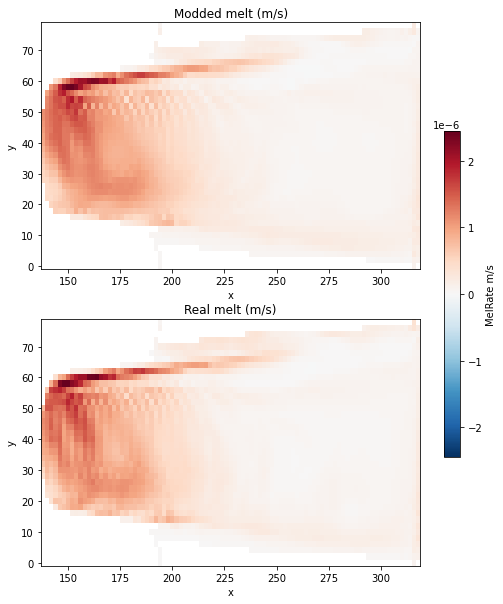

In [42]:
Var_names_X = ['thermalDriving', 'x', 'y', 'iceDraft', 'halineDriving']
Data = Data_clean.loc[Data_clean.date == 239].reset_index(drop = True)
X = Data[Var_names_X]
X_N = np.array((X - MeanX)/StdX)
X_N = np.array(X_N).reshape(-1, 5, )

Y_mod = Model(X_N)*MaxY
#Data['Mod_MeltR'] = Y_mod.numpy().reshape(len(Y_mod), )
Data['Mod_MeltR'] = np.array(Y_mod)
Data = Data.set_index(['date', 'y', 'x'])
Dataset = Data.to_xarray()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8.5, 10))
cmap = plt.get_cmap('viridis')
ax1, ax2 = axes
a = Dataset.Mod_MeltR.plot(ax = ax1,add_colorbar=False, robust=False)
ax1.set_title('Modded melt (m/s)')
Dataset.meltRate.plot(ax = ax2, add_colorbar=False, robust=False)
ax2.set_title('Real melt (m/s)')

ax=plt.gca()
cbar = plt.colorbar(a, cmap = cmap, ax = axes, shrink = 0.6, label = 'MelRate m/s')

In [22]:
Dataset.Mod_MeltR

<xarray.DataArray 'Mod_MeltR' (date: 1, y: 40, x: 91)>
array([[[           nan,            nan,            nan, ...,
                    nan, 1.14477274e-07,            nan],
        [           nan,            nan,            nan, ...,
         3.71782285e-08, 1.16591913e-07, 1.10537883e-07],
        [           nan,            nan,            nan, ...,
         5.70633070e-08, 2.38571346e-07, 1.54308864e-07],
        ...,
        [           nan,            nan,            nan, ...,
         4.76369912e-08, 3.54389549e-08, 3.66317501e-08],
        [           nan,            nan,            nan, ...,
         1.58877782e-07, 2.41421191e-07, 6.66492994e-08],
        [           nan,            nan,            nan, ...,
                    nan, 2.18418066e-07,            nan]]], dtype=float32)
Coordinates:
  * date     (date) int64 239
  * y        (y) int64 0 2 4 6 8 10 12 14 16 18 ... 62 64 66 68 70 72 74 76 78
  * x        (x) int64 138 140 142 144 146 148 150 ... 308 310 312 314 316 318

In [ ]:
fig, axs = plot.subplots(ncols=1, nrows=2, 
axwidth=5, proj='pcarree')
ax1, ax2, ax3, ax4, ax5, ax6 = axs
a = S06_mam_seas_1.plot.contourf(ax=ax1,  add_colorbar = False,levels = levels)

S06_mam_seas_6.plot.contourf(ax=ax6, add_colorbar = False, levels = levels)


#cbar = fig.colorbar(a,  loc="bottom", cmap = cmap, labelsize= 22, label = units, shrink = 1)

In [89]:
Var_names_X = ['thermalDriving', 'x', 'y', 'iceDraft', 'halineDriving']
Data = Data_clean
X = Data[Var_names_X]
X_N = np.array((X - MeanX)/StdX)
X_N = np.array(X_N).reshape(-1, 5, )

Y_mod = Model(X_N)*MaxY
#Data['Mod_MeltR'] = Y_mod.numpy().reshape(len(Y_mod), )
Data['Mod_MeltR'] = np.array(Y_mod)
Data = Data.set_index(['date', 'y', 'x'])
Dataset = Data.to_xarray()

In [90]:
t = Dataset.isel(date=slice(0, 240, 24))

In [93]:
t[['Mod_MeltR' , 'meltRate']].plot(x='x', y='y', col='date', col_wrap=3)

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

In [96]:
A = t[['Mod_MeltR' , 'meltRate']].to_array()